In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
train=pd.read_csv('train_E6oV3lV.csv')

In [3]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
test=pd.read_csv('test_tweets_anuFYb8.csv')


In [5]:
print(test.shape)
test.head()

(17197, 2)


,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [6]:
test['state']=np.random.randint(0,5,size=len(test))

In [7]:
test.head()
test.shape

(17197, 3)

In [8]:
#state={'0':'Delhi','1':'Mumbai','2':'Kolkata','3':'Chennai','4':'UttarPradesh'}
test.state[test.state == 0]= 'Delhi'
test.state[test.state == 1]= 'Mumbai'
test.state[test.state == 2]= 'Kolkata'
test.state[test.state == 3]= 'Chennai'
test.state[test.state == 4]= 'UttarPradesh'
print(test.head(20))



       id                                              tweet         state
0   31963  #studiolife #aislife #requires #passion #dedic...         Delhi
1   31964   @user #white #supremacists want everyone to s...  UttarPradesh
2   31965  safe ways to heal your #acne!!    #altwaystohe...       Chennai
3   31966  is the hp and the cursed child book up for res...  UttarPradesh
4   31967    3rd #bihday to my amazing, hilarious #nephew...        Mumbai
5   31968                        choose to be   :) #momtips        Chennai
6   31969  something inside me dies ð¦ð¿â¨  eyes nes...       Kolkata
7   31970  #finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸...        Mumbai
8   31971   @user @user @user i will never understand why...         Delhi
9   31972  #delicious   #food #lovelife #capetown mannaep...         Delhi
10  31973  1000dayswasted - narcosis infinite ep.. make m...  UttarPradesh
11  31974  one of the world's greatest spoing events   #l...        Mumbai
12  31975  half way throu

C:\Users\rameshwaram\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
test.iloc[200:2500 , 2:]='Kolkata'
test.iloc[3000:6000, 2:]='UttarPradesh'
test.iloc[7000:8000,2:]='Mumbai'
test.iloc[10000:13000, 2:]='Delhi'
test.head()
number=test.state.value_counts()
number

Delhi           4593
UttarPradesh    4528
Kolkata         3879
Mumbai          2591
Chennai         1606
Name: state, dtype: int64

In [10]:
combi = train.append(test, ignore_index=True)
combi.shape

C:\Users\rameshwaram\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


(49159, 4)

In [11]:
combi.head()

,id,label,state,tweet
0,1,0.0,NaN,@user when a father is dysfunctional and is s...
1,2,0.0,NaN,@user @user thanks for #lyft credit i can't us...
2,3,0.0,NaN,bihday your majesty
3,4,0.0,NaN,#model i love u take with u all the time in ...
4,5,0.0,NaN,factsguide: society now #motivation


In [12]:
combi.tail()

,id,label,state,tweet
49154,49155,NaN,Mumbai,thought factory: left-right polarisation! #tru...
49155,49156,NaN,Chennai,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,Delhi,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,Chennai,"happy, at work conference: right mindset leads..."
49158,49159,NaN,Kolkata,"my song ""so glad"" free download! #shoegaze ..."


In [13]:
combi[combi['state']=='Delhi']

,id,label,state,tweet
31962,31963,NaN,Delhi,#studiolife #aislife #requires #passion #dedic...
31970,31971,NaN,Delhi,@user @user @user i will never understand why...
31971,31972,NaN,Delhi,#delicious #food #lovelife #capetown mannaep...
31974,31975,NaN,Delhi,half way through the website now and #allgoing...
31980,31981,NaN,Delhi,"ð­ðð #girls #sun #fave @ london, uni..."
31981,31982,NaN,Delhi,thought factory: bbc neutrality on right wing ...
31985,31986,NaN,Delhi,never been this down on myself in my entire li...
31992,31993,NaN,Delhi,i'll #never be #120 #again i'm #i'm a #thick...
31998,31999,NaN,Delhi,food time for haylie ð hot chocolate for mu...
32003,32004,NaN,Delhi,#raw food diet benefits! - #altwaystoheal #...


# Remove pattern like @

In [14]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

In [15]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*") 
combi.head()

,id,label,state,tweet,tidy_tweet
0,1,0.0,NaN,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,NaN,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,NaN,bihday your majesty,bihday your majesty
3,4,0.0,NaN,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,NaN,factsguide: society now #motivation,factsguide: society now #motivation


In [16]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combi.head()

,id,label,state,tweet,tidy_tweet
0,1,0.0,NaN,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,NaN,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't cause they don't off...
2,3,0.0,NaN,bihday your majesty,bihday your majesty
3,4,0.0,NaN,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0.0,NaN,factsguide: society now #motivation,factsguide: society #motivation


# Tokenizing

In [17]:
token = combi['tidy_tweet'].apply(lambda x: x.split()) 

In [18]:
token.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, can't, cause, they, do...
2                              [bihday, your, majesty]
3    [#model, love, take, with, time, urð±!!!, ð...
4                  [factsguide:, society, #motivation]
Name: tidy_tweet, dtype: object

# Stemming

In [19]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = token.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [20]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
combi['tidy_tweet'] = tokenized_tweet

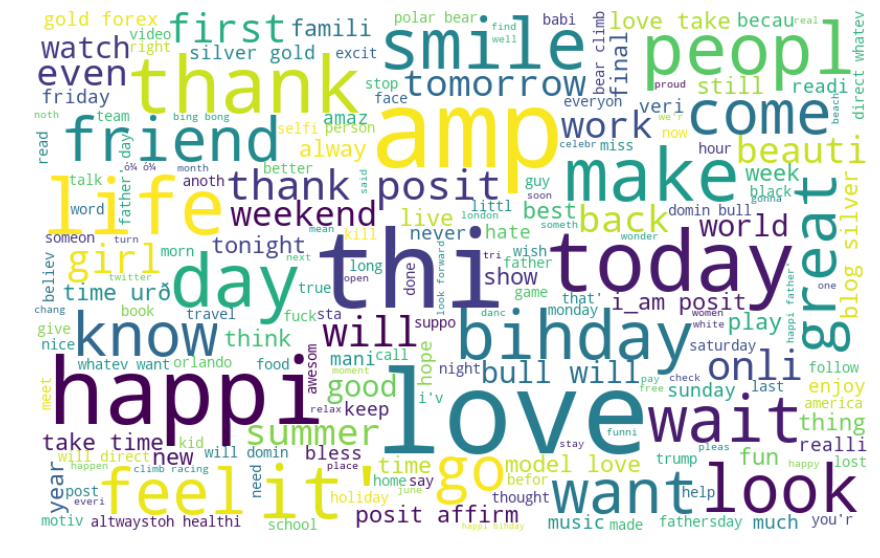

In [21]:
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white',width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

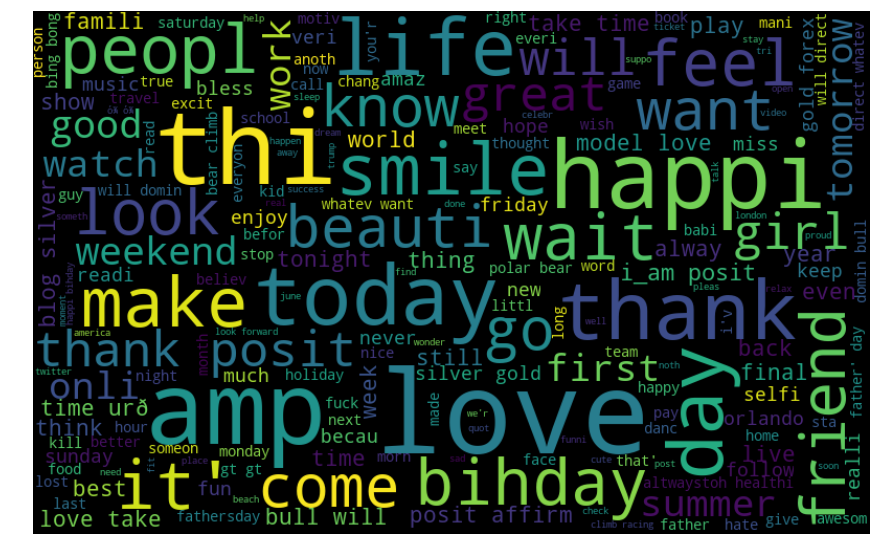

In [22]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

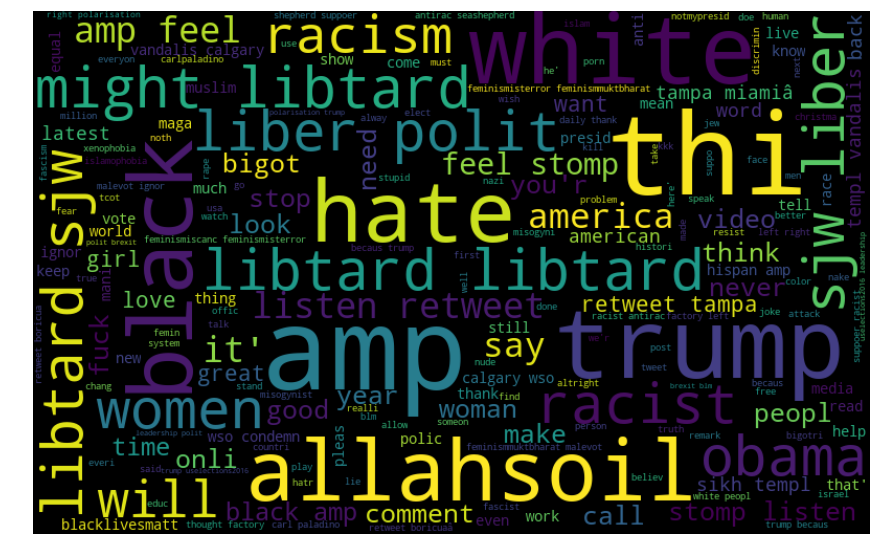

In [23]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Extract positive and negative words

In [24]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [25]:
ht_positive= hashtag_extract(combi['tidy_tweet'][combi['label']==0])

In [26]:
ht_negative= hashtag_extract(combi['tidy_tweet'][combi['label']==1])

In [27]:
# unnesting list
ht_positive = sum(ht_positive,[])
ht_negative = sum(ht_negative,[])

In [28]:
print(ht_positive)

['run', 'lyft', 'disapoint', 'getthank', 'model', 'motiv', 'allshowandnogo', 'school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl', 'allin', 'cav', 'champion', 'cleveland', 'clevelandcavali', 'gr8', 'ireland', 'blog', 'silver', 'gold', 'forex', 'orlando', 'standwithorlando', 'pulseshoot', 'orlandoshoot', 'biggerproblem', 'selfish', 'heabreak', 'valu', 'love', '80day', 'gettingf', 'got7', 'junior', 'yugyoem', 'omg', 'thank', 'posit', 'friday', 'cooki', 'euro2016', 'badday', 'coneofsham', 'cat', 'piss', 'funni', 'laugh', 'wine', 'weekend', 'tgif', 'gamedev', 'indiedev', 'indiegamedev', 'squad', 'upsideofflorida', 'shopalyssa', 'love', 'smile', 'media', 'pressconfer', 'antalya', 'turkey', 'throwback', 'ica16', 'rip', 'orlando', 'alohafriday', 'time', 'not', 'exist', 'positivevib', 'hawaiian', 'goodnight', 'badmonday', 'taylorswift1989', 'travelingram', 'dalat', 'ripinkylif', 'photoshop', 'enoughisenough', 'dontphotoshopeveryth', 'wheresallthenaturalphoto', 'cedarpoin

In [29]:
print(ht_negative)

['cnn', 'michigan', 'tcot', 'australia', 'opkillingbay', 'seashepherd', 'helpcovedolphin', 'thecov', 'helpcovedolphin', 'neverump', 'xenophobia', 'love', 'peac', 'race', 'ident', 'medâ', 'altright', 'whitesupremaci', 'linguist', 'race', 'power', 'raciolinguist', 'brexit', 'peopl', 'trump', 'republican', 'michelleobama', 'knick', 'golfâ', 'jewishsupremacist', 'libtard', 'sjw', 'liber', 'polit', 'trash', 'hate', 'â', 'stereotyp', 'prejudic', 'hope', 'hate', 'conflictâ', 'pol', 'bluelivesmatt', 'draintheswamp', 'ferguson', '2016', 'antisemit', 'hocoschool', 'columbiamd', 'hocomd', 'nazi', 'hatred', 'bigotri', 'libtard', 'sjw', 'liber', 'polit', 'p21', 'fyi', 'tcot', 'topoli', 'blacklivesmatt', 'ushistori', 'eugen', 'biher', 'bigotri', 'altright', 'potu', 'theresist', 'crime', 'officerâ', 'black', 'retweet', 'tampa', 'miamiâ', 'allahsoil', 'prais', 'cleveland', 'rnc', 'white', 'tamirric', 'rip', 'bigot', 'blacklivesmatt', 'feminismiscanc', 'feminismisterror', 'feminismmuktbharat', 'malevot

In [30]:
import seaborn as sns
import nltk

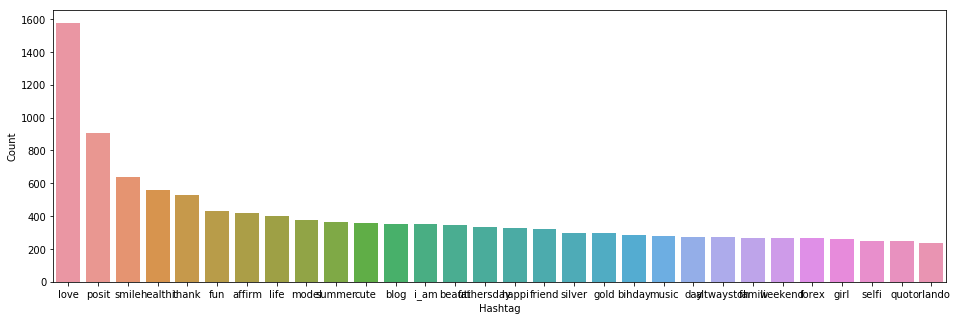

In [31]:
f = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(f.keys()),
                  'Count': list(f.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 30) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

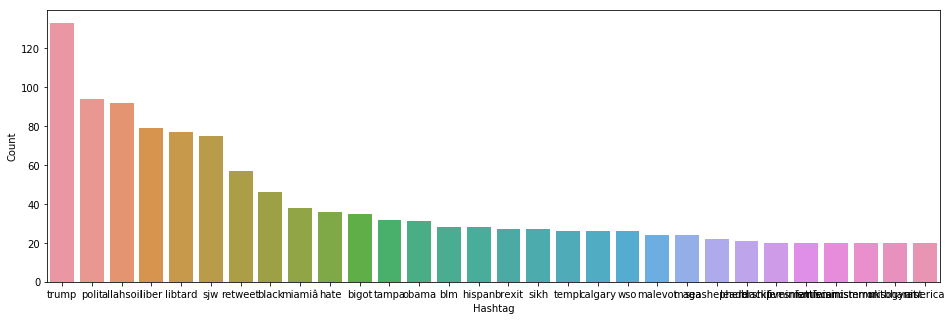

In [32]:
f = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(f.keys()),
                  'Count': list(f.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 30) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

# Extracting features

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [34]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])
bow.shape

(49159, 1000)

# TD-IDF features

In [35]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
tfidf.shape

(49159, 1000)

# Word Embedding

In [ ]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(combi['tidy_tweet']), epochs=20)

C:\Users\rameshwaram\Anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


In [ ]:
model_w2v.wv.most_similar(positive="dinner")

# Prepare vector

In [ ]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec

In [ ]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape    

In [ ]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import LabeledSentence

In [ ]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

In [ ]:
labeled_tweets = add_label(tokenized_tweet) # label all the tweets

In [ ]:
labeled_tweets[:6]

In [ ]:
model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model 
                                  dm_mean=1, # dm = 1 for using mean of the context word vectors
                                  size=200, # no. of desired features
                                  window=5, # width of the context window
                                  negative=7, # if > 0 then negative sampling will be used
                                  min_count=5, # Ignores all words with total frequency lower than 2.
                                  workers=3, # no. of cores
                                  alpha=0.1, # learning rate
                                  seed = 23)

model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])

In [ ]:
docvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(combi)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))
    
docvec_df = pd.DataFrame(docvec_arrays)
docvec_df.shape

# Model Building 

### Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [ ]:
train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'],  
                                                          random_state=42, 
                                                          test_size=0.3)

In [ ]:
lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) # calculating f1 score

In [ ]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label','state']]
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file

In [ ]:
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

In [ ]:
lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

In [ ]:
result=pd.read_csv("sub_lreg_bow.csv")
result[result['label']==0].state.value_counts()

In [ ]:
from sklearn import svm

In [ ]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow, ytrain)

prediction = svc.predict_proba(xvalid_bow)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

In [ ]:
test_pred = svc.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission1 = test[['id','label']]
submission1.to_csv('sub_svc_bow.csv', index=False)

In [ ]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_tfidf, ytrain)

prediction = svc.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

In [ ]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v, ytrain)

prediction = svc.predict_proba(xvalid_w2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

In [ ]:
result1=pd.read_csv("sub_svc_bow.scv")
result[result['label']==0].state.value_counts()


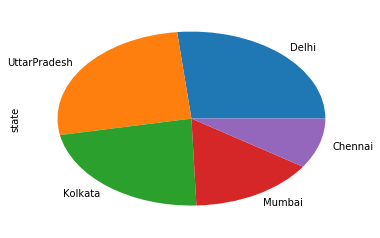

In [16]:
number.plot(kind='pie')

In [ ]:
result.plot(kind='pie')

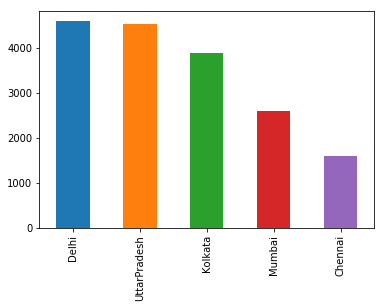

In [17]:
number.plot(kind='bar')

In [ ]:
result.plot(kind='bar')